In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime

In [0]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%b-%y')

In [3]:
time = pd.read_csv("USCarrier_Traffic.csv",
                   parse_dates=['Period'], index_col='Period',
                   date_parser=dateparse)
time.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


,Total
Period,
2000-01-01,49045412
2000-02-01,49306303
2000-03-01,60443541
2000-04-01,58286680
2000-05-01,60533783


In [4]:
time1 = time['Total']
time1.head()

Period
2000-01-01    49045412
2000-02-01    49306303
2000-03-01    60443541
2000-04-01    58286680
2000-05-01    60533783
Name: Total, dtype: int64

In [5]:
time1.tail()

Period
2019-10-01    88190827
2019-11-01    80993251
2019-12-01    90371201
2020-01-01    81511977
2020-02-01    74398772
Name: Total, dtype: int64

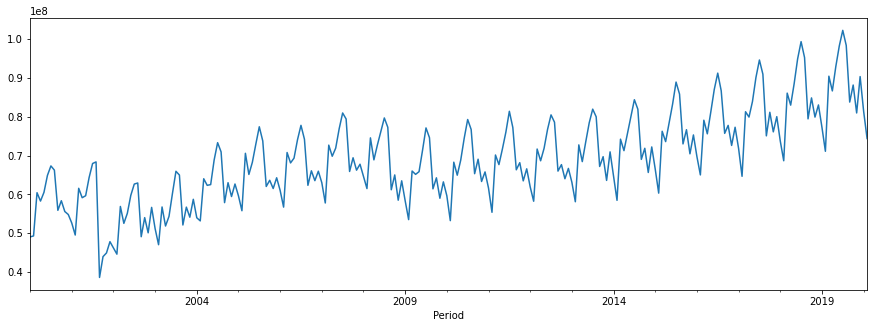

In [6]:
time1.plot(kind="line",figsize=(15,5))
plt.show()

In [7]:
time.shape

(242, 1)

In [0]:
#12 years * 12 months =144 data points
#lets take 10 years data as TRAIN data and 2 years data as TEST data

In [0]:
train=time1[0:207] 
test=time1[207:]

In [0]:
#train.head()

In [0]:
#test.head()

In [0]:
#train.tail()

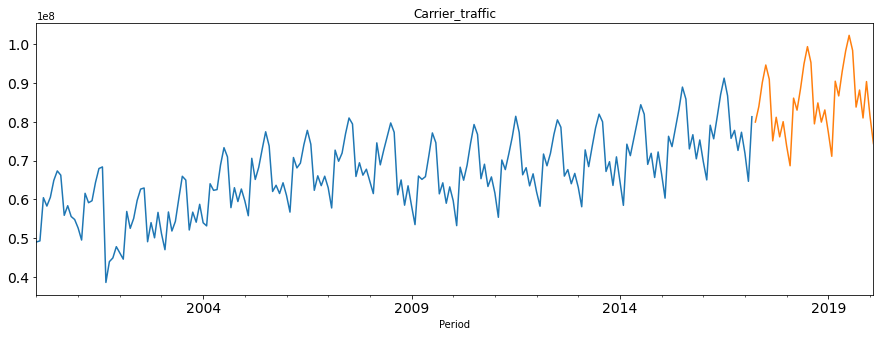

In [13]:
train.plot(figsize=(15,5), title= 'Carrier_traffic', fontsize=14)
test.plot(figsize=(15,5), title= 'Carrier_traffic', fontsize=14)
plt.show()

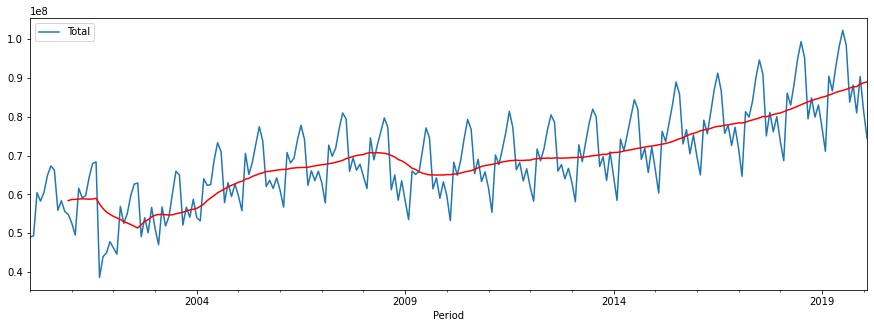

In [14]:
#moving_avg = pd.rolling_mean(time1,12)

moving_avg =time1.rolling(12).mean()
time.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


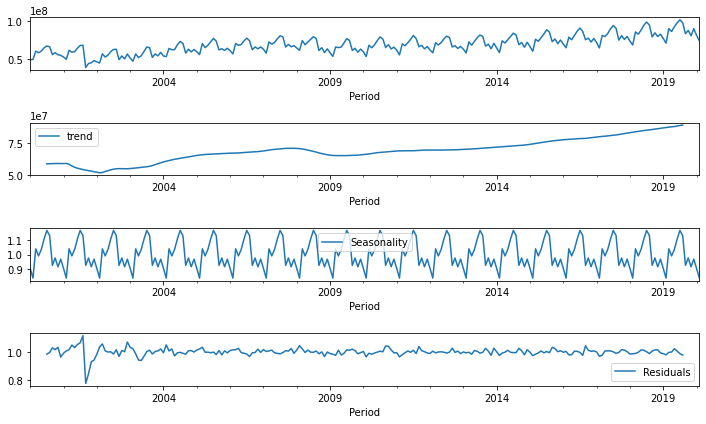

In [15]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time1,model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


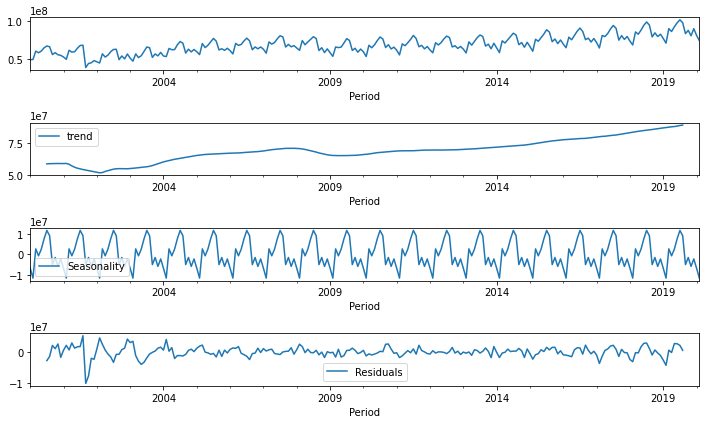

In [16]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time1,model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [0]:
#trend

In [0]:
#seasonal

In [0]:
#residual

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [21]:
train = train.astype('double')
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(36)
ses.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,207
Model:,SimpleExpSmoothing,SSE,8987767381992213.000
Optimized:,True,AIC,6504.198
Trend:,None,BIC,6510.863
Seasonal:,None,AICC,6504.396
Seasonal Periods:,None,Date:,"Sun, 07 Jun 2020"
Box-Cox:,False,Time:,07:28:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7024217,alpha,True
initial_level,4.9045e+07,l.0,True


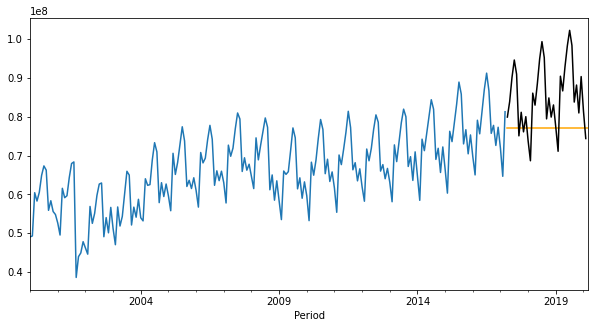

In [22]:
train.plot(kind="line",figsize=(10,5))
ses1.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()

In [23]:
hes = ExponentialSmoothing(train , trend='add').fit()
hes.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Dep. Variable:,endog,No. Observations:,207
Model:,ExponentialSmoothing,SSE,8990507166551222.000
Optimized:,True,AIC,6508.261
Trend:,Additive,BIC,6521.592
Seasonal:,None,AICC,6508.681
Seasonal Periods:,None,Date:,"Sun, 07 Jun 2020"
Box-Cox:,False,Time:,07:28:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6842105,alpha,True
smoothing_slope,0.0001,beta,True


In [0]:
hes1 = hes.forecast(24)

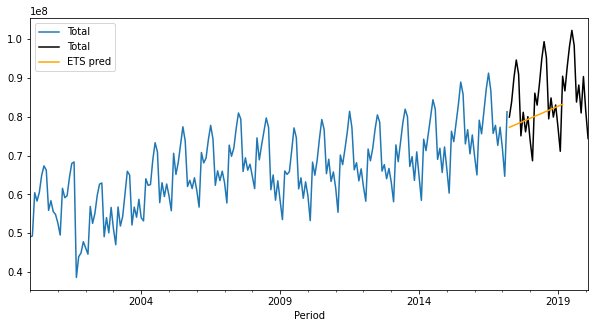

In [25]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [26]:
hwes = ExponentialSmoothing(train , seasonal_periods=12 ,trend='add', seasonal="multiplicative",).fit()
hwes.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,207
Model:,ExponentialSmoothing,SSE,671311996797746.375
Optimized:,True,AIC,5995.160
Trend:,Additive,BIC,6048.484
Seasonal:,Multiplicative,AICC,5998.798
Seasonal Periods:,12,Date:,"Sun, 07 Jun 2020"
Box-Cox:,False,Time:,07:28:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6298028,alpha,True
smoothing_slope,0.0012768,beta,True


In [0]:
hwes1 = hwes.forecast(36)
#print(hwes1)

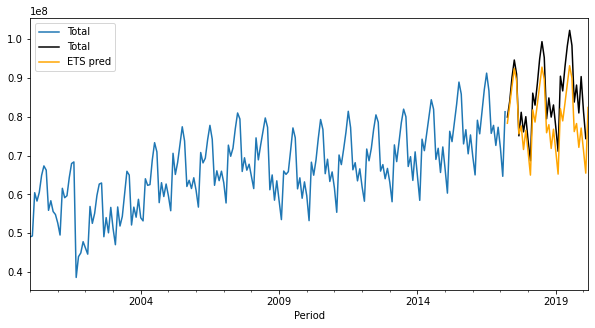

In [28]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.DataFrame.rolling(timeseries, window=12).mean()
    rolstd = pd.DataFrame.rolling(timeseries, window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

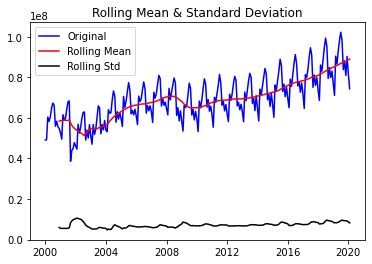

Results of Dickey-Fuller Test:
Test Statistic                   0.223216
p-value                          0.973534
#Lags Used                      13.000000
Number of Observations Used    228.000000
Critical Value (1%)             -3.459361
Critical Value (5%)             -2.874302
Critical Value (10%)            -2.573571
dtype: float64


In [30]:
test_stationarity(time1)

In [0]:
#series is not stationary as mean is increasing even though the std.
#pvalue> 0.05 hence H0 accepted that the series is nonstationary

In [0]:
diff1=train.diff()
diff1=diff1.dropna()

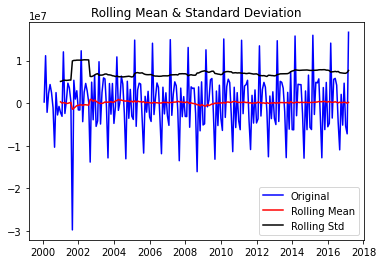

Results of Dickey-Fuller Test:
Test Statistic                  -3.691589
p-value                          0.004233
#Lags Used                      12.000000
Number of Observations Used    193.000000
Critical Value (1%)             -3.464694
Critical Value (5%)             -2.876635
Critical Value (10%)            -2.574816
dtype: float64


In [33]:
test_stationarity(diff1)

In [0]:
diff2=diff1.diff()
diff2=diff2.dropna()

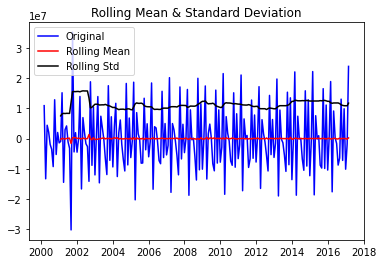

Results of Dickey-Fuller Test:
Test Statistic                -7.537001e+00
p-value                        3.457190e-11
#Lags Used                     1.500000e+01
Number of Observations Used    1.890000e+02
Critical Value (1%)           -3.465431e+00
Critical Value (5%)           -2.876957e+00
Critical Value (10%)          -2.574988e+00
dtype: float64


In [35]:
test_stationarity(diff2)

In [0]:
#series is stationary as mean and std is constatnt.
#pvalue< 0.05 hence H0 rejected that the series is stationary

In [0]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

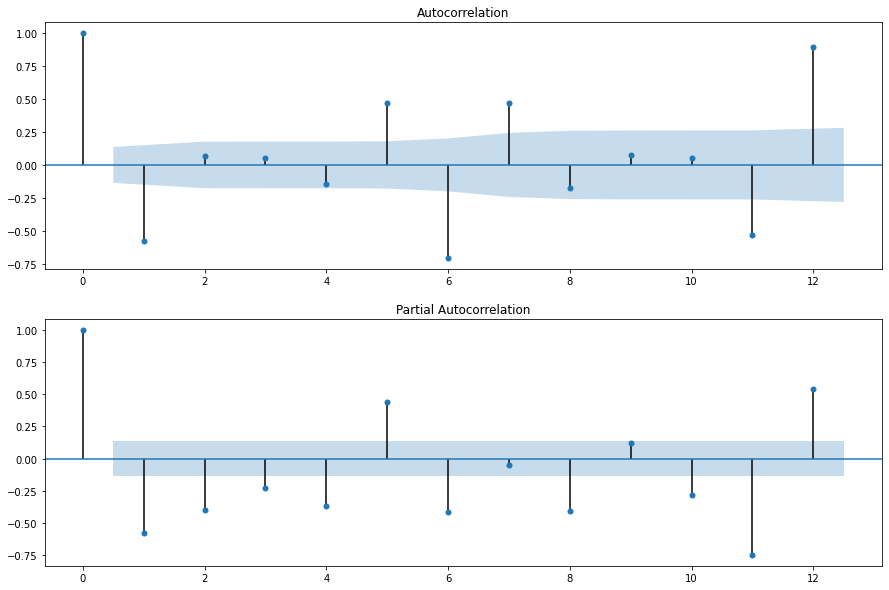

In [38]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff2, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diff2, ax=pyplot.gca(),lags=12)
pyplot.show()

In [0]:
#pip install pmdarima

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmo

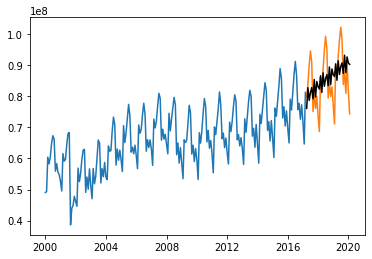

In [40]:
from pmdarima import auto_arima
model = auto_arima(train)
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [0]:
#print(forecast)

In [42]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  207
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -3490.984
Date:                Sun, 07 Jun 2020   AIC                           6997.967
Time:                        07:28:22   BIC                           7024.590
Sample:                             0   HQIC                          7008.735
                                - 207                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.692e+05   1.96e-07   1.37e+12      0.000    2.69e+05    2.69e+05
ar.L1         -0.9586      0.071    -13.570      0.000      -1.097      -0.820
ar.L2          0.3426      0.128      2.686      0.0

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [44]:
model = ARIMA(train, order=(2,2,2))
model_fit=model.fit(disp=True)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.Total   No. Observations:                  205
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -3502.813
Method:                       css-mle   S.D. of innovations        6278014.032
Date:                Sun, 07 Jun 2020   AIC                           7017.626
Time:                        07:28:23   BIC                           7037.564
Sample:                    03-01-2000   HQIC                          7025.690
                         - 03-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -271.2614   5666.894     -0.048      0.962   -1.14e+04    1.08e+04
ar.L1.D2.Total    -1.0886      0.070    -15.512      0.000      -1.226      -0.951
ar.L2.D2.Total    -0.3783      0.066

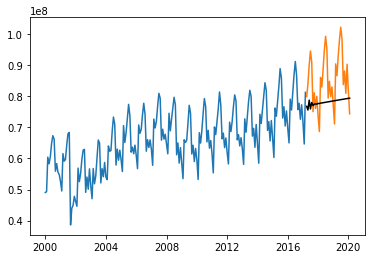

In [47]:
forecast = model_fit.forecast(steps=35)[0]

forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

8810128.218033966


In [0]:
import statsmodels.api as sm

In [0]:
diffs1=diff2.diff(12)
diffs1=diffs1.dropna()

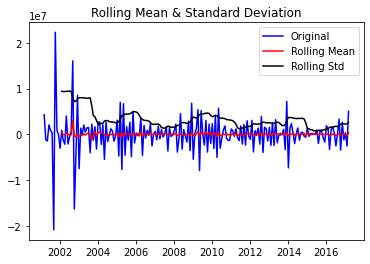

Results of Dickey-Fuller Test:
Test Statistic                -5.954732e+00
p-value                        2.106360e-07
#Lags Used                     1.400000e+01
Number of Observations Used    1.780000e+02
Critical Value (1%)           -3.467632e+00
Critical Value (5%)           -2.877918e+00
Critical Value (10%)          -2.575501e+00
dtype: float64


In [52]:
test_stationarity(diffs1)

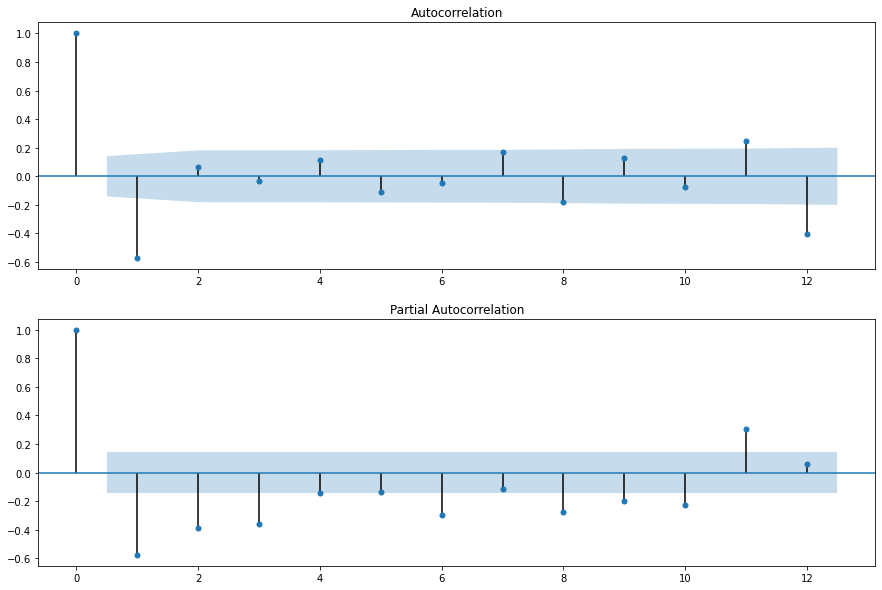

In [53]:
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diffs1, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diffs1, ax=pyplot.gca(),lags=12)
pyplot.show()

In [54]:
train.shape

(207,)

In [55]:
model = sm.tsa.SARIMAX(train, order=(2,2,2), seasonal_order=(0,1,2,12))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [56]:
model_fit=model.fit(disp=True)
print(model_fit.summary())


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                              Total   No. Observations:                  207
Model:             SARIMAX(2, 2, 2)x(0, 1, 2, 12)   Log Likelihood               -3104.332
Date:                            Sun, 07 Jun 2020   AIC                           6222.664
Time:                                    07:30:43   BIC                           6245.503
Sample:                                01-01-2000   HQIC                          6231.913
                                     - 03-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1208      0.587     -1.910      0.056      -2.271       0.029
ar.L2         -0.2144      0.172   

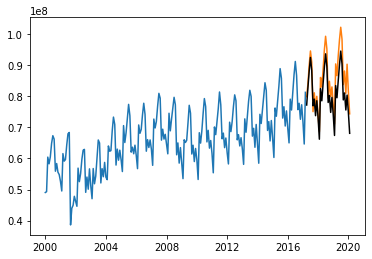

In [59]:
forecast = model_fit.forecast(steps=35)
#print(forecast)

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [60]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

4518046.571096089
